# **EDA Costumers - Telco Company**

## Initial Settings

In [91]:
# Importing libraries
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
from scipy.stats import kruskal
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import numpy as np

In [92]:
# Loading the cvs file -> Turning into a dataframe
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


________________________________________________________

## **Initial Pre-processing**

In [93]:
# Removing duplicates and null rows

df = df.drop_duplicates()
df = df.dropna(how='all')

In [94]:
print('The number of rows of the dataset is: ', len(df))

The number of rows of the dataset is:  7043


In [95]:
# Viewing data types

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [96]:
# TotalCharges values that could not be converted to numerical
invalid_values = df['TotalCharges'][pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

# Unique Values:
invalid_values.unique()


array([' '], dtype=object)

Null values present in TotalCharges column. Let's investigate these values:

In [97]:
# Selecting all ' ' TotalCharges values:
invalid_rows = df[df['TotalCharges'] == ' ']

invalid_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Since the tenure column, which indicates the number of months the customer has been with the company, is also zero, we can assume that they are recent customers, not even paying the first installment of the contract. Therefore, I will fill in the TotalCharges values ​​with 0, instead of ' '.

In [98]:
# Replacing TotalCharges values

df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

Now, I can convert the column to numeric:

In [99]:
# Converting TotalCharges from object to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [100]:
# Checking count of unique values ​​in each column

print('Count of unique values per column:')
df.nunique()

Count of unique values per column:


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Same number of costumer ID and the lenght of the dataset. We can assume that every Costumer ID is unique.

In [101]:
# Viewing key numeric metrics for each feature/target

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Although it is a numerical data, Senior Citizen represents a categorical variable, being 0 or 1.

In [102]:
# Verifing NaN values per feature

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### **Analyzing outliers**

- According to the business rules:
    - Tenure cannot be negative;
    - MonthlyCharges cannot be negative;
    - TotalCharges cannot be negative.

There is no data violating the business rules in the dataset (as seen in the describe).

Visualizing outliers throught boxplots:

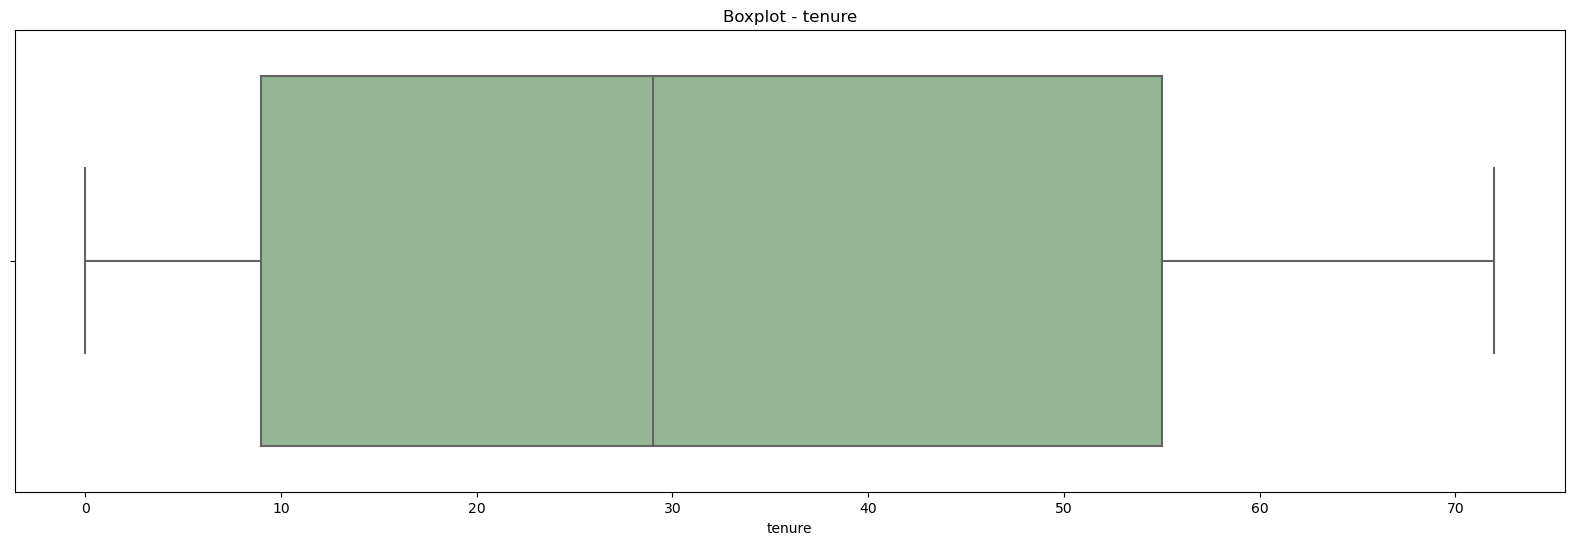

In [103]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=df['tenure'], color ='darkseagreen')
plt.title(f"Boxplot - tenure")
plt.xlabel('tenure')
plt.show()

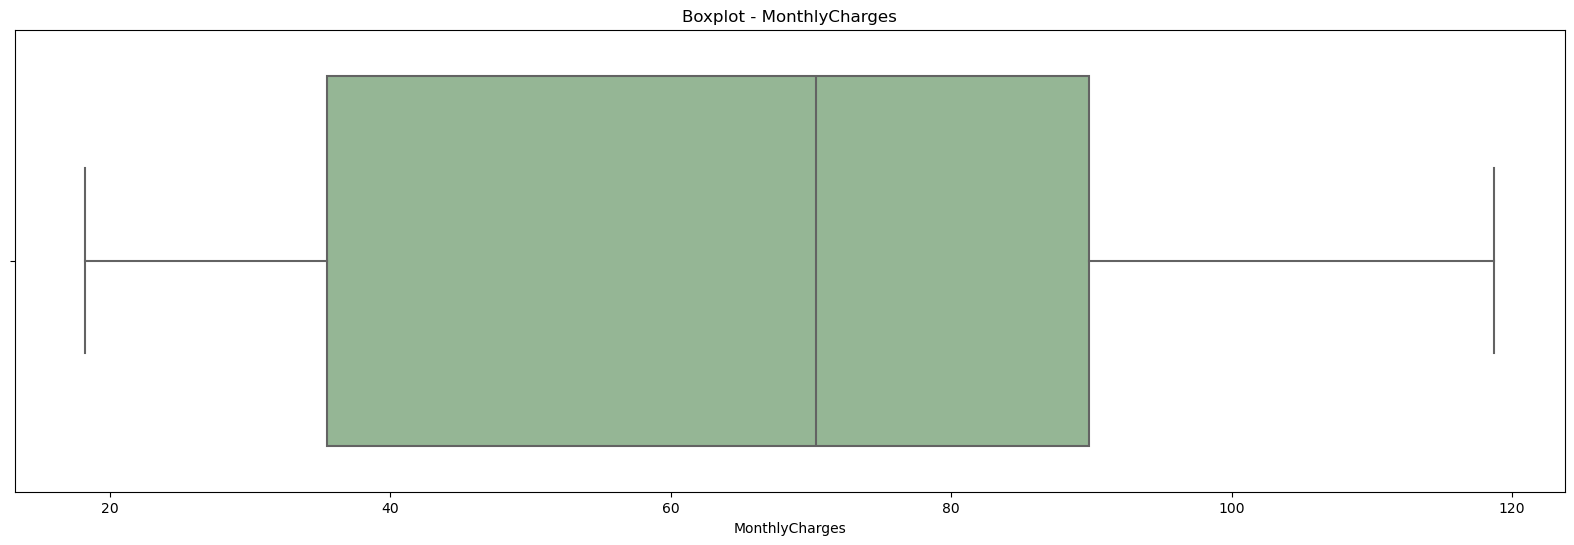

In [104]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=df['MonthlyCharges'], color ='darkseagreen')
plt.title(f"Boxplot - MonthlyCharges")
plt.xlabel('MonthlyCharges')
plt.show()

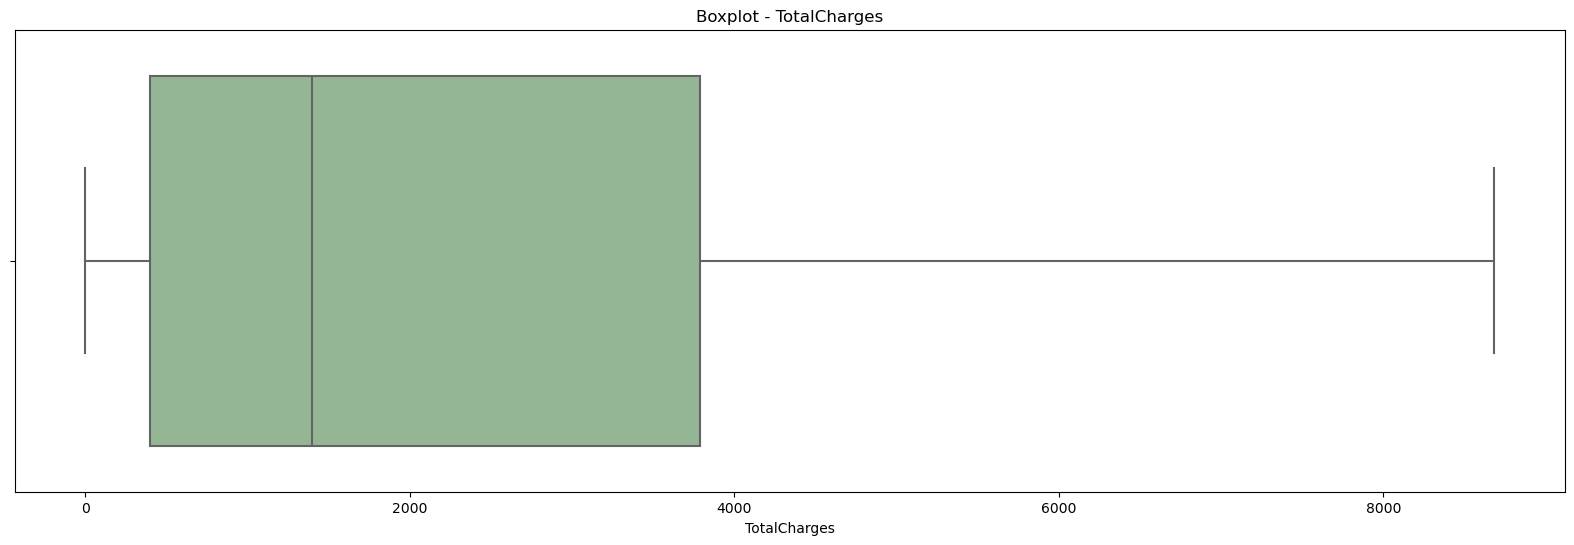

In [105]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=df['TotalCharges'], color ='darkseagreen')
plt.title(f"Boxplot - TotalCharges")
plt.xlabel('TotalCharges')
plt.show()

IQR Method:

In [106]:
# Iterate column by column setting IQR
def find_outliers_iqr(data):
    outlier_info = []
    for column in data.select_dtypes(include=['float', 'int']).columns:
        q3 = data[column].quantile(0.75)
        q1 = data[column].quantile(0.25)
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr
        outliers = ((data[column] < lower) | (data[column] > upper)).sum()
        outlier_info.append({"Column": column, "Outliers": outliers})
    return pd.DataFrame(outlier_info)

# Printing values ​​outside the IQR by column
outliers_df = find_outliers_iqr(df)
outliers_df


,Column,Outliers
0,SeniorCitizen,1142
1,tenure,0
2,MonthlyCharges,0
3,TotalCharges,0


An entire class in the Senior Citizen category was classified as an outlier, but it can be included in the prediction.

### **Analysing distribuition**

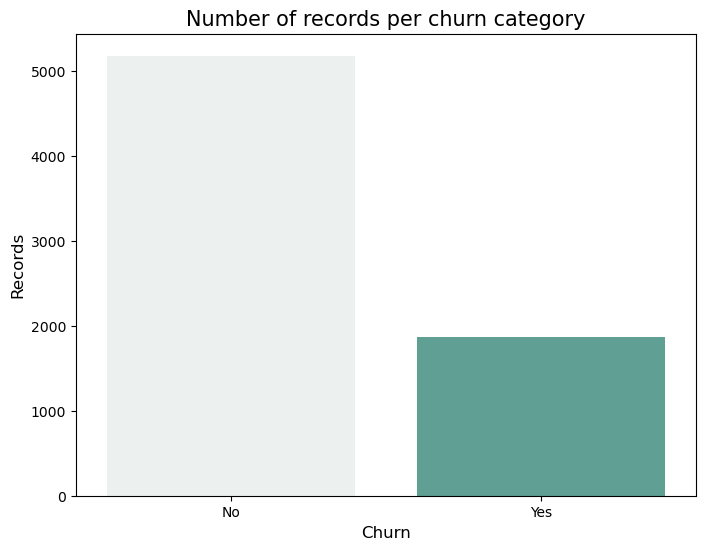

In [107]:
# Number of records per churn category

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', palette='light:#5A9')
plt.title('Number of records per churn category', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Records', fontsize=12)
plt.xticks(rotation=0)
plt.show()


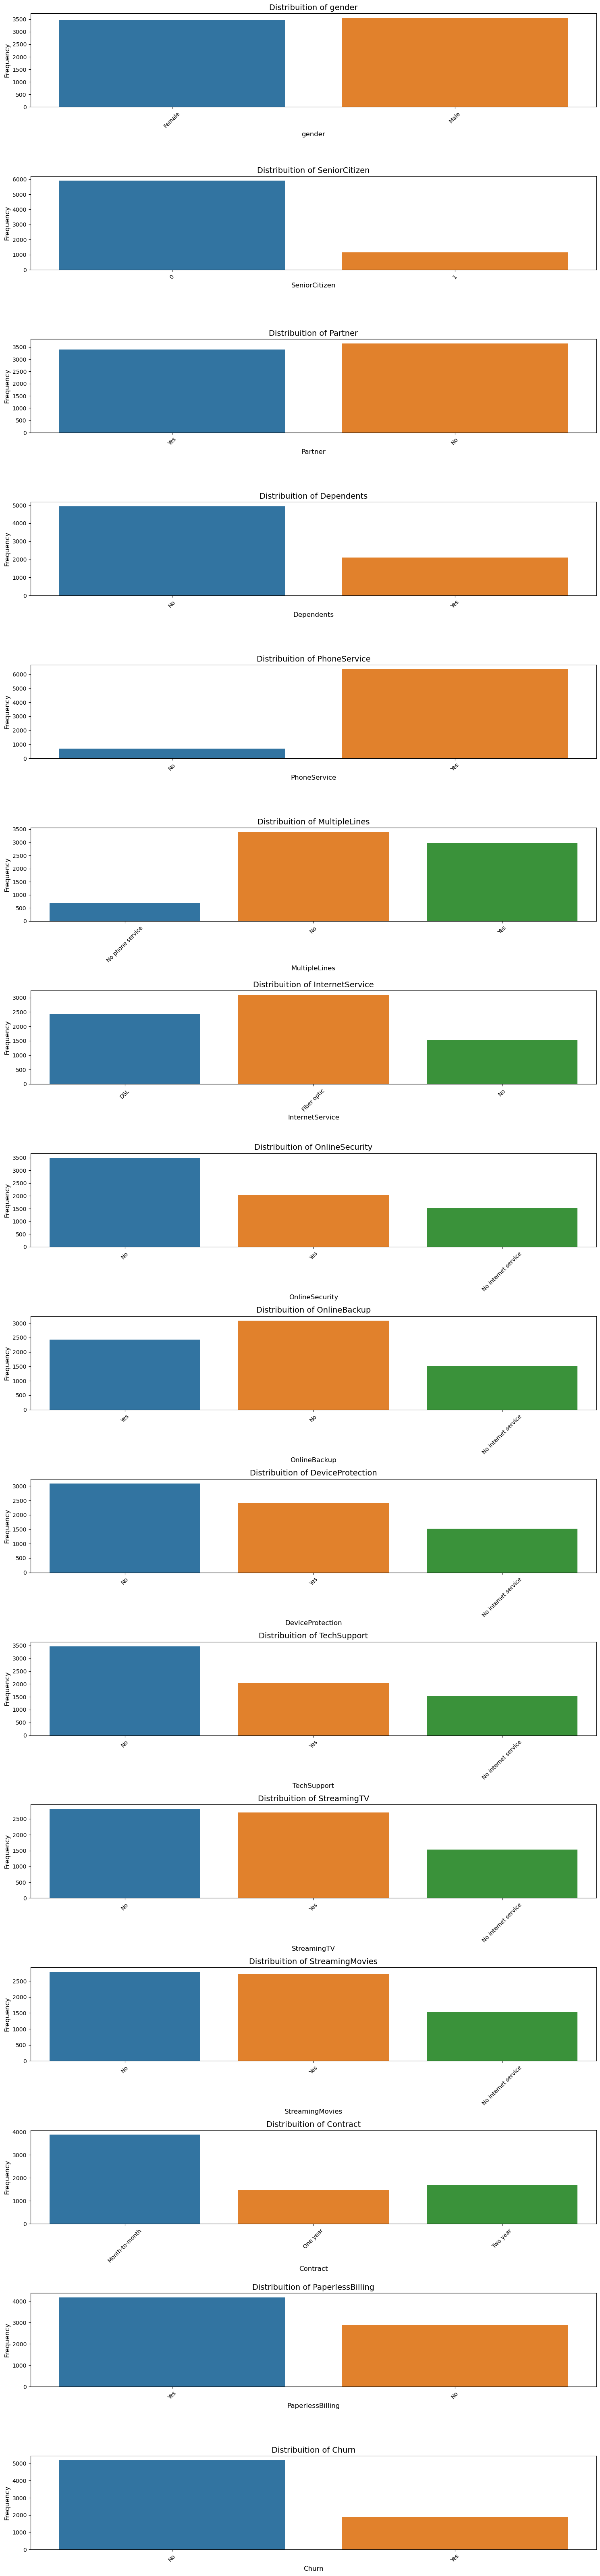

In [108]:
# Analysing imbalanced categorical columns

categorical_columns = [col for col in df.columns if df[col].nunique() <= 3]
plt.figure(figsize=(15, len(categorical_columns) * 4))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.color_palette('light:#5A9', as_cmap=True)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribuition of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


PhoneService, SeniorCitizen, Dependents MultipleLines and Churn has imbalanced classes.

I will see how the dataset behaves in predictions and, if necessary, perform an augmentation.

Pairplot:

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

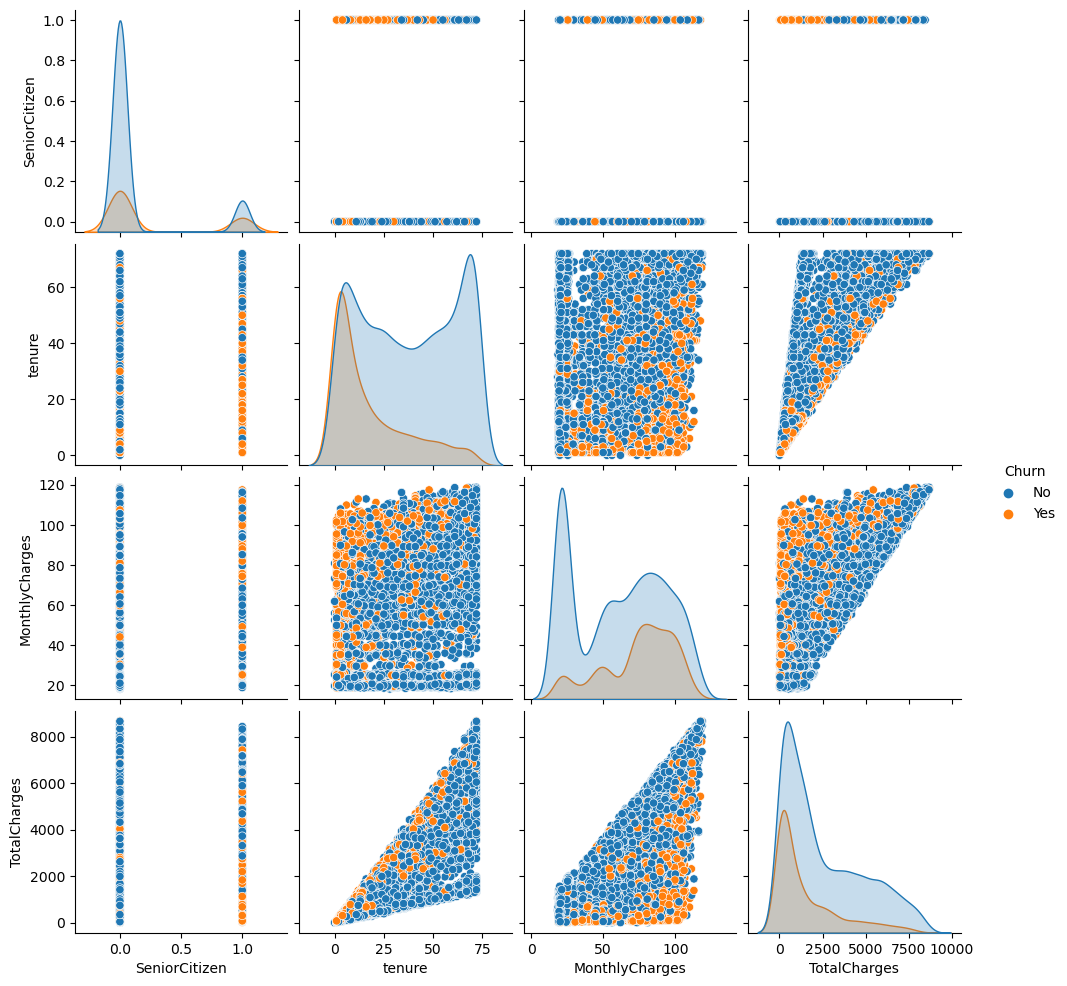

In [109]:
sns.color_palette('light:#5A9', as_cmap=True)

sns.pairplot(df, hue='Churn')
plt.show()


- Customers with higher tenure seem to have a lower probability of churn.  
- There is higher churn among customers with higher monthly charges.  
- Customers with high TotalCharges show little churn.  
- Tenure and TotalCharges have a strong positive linear correlation.  

**Variables such as tenure, MonthlyCharges, and TotalCharges appear to be strong candidates for predicting churn.**

### **Correlation**

- Trying to find Collinearity;
- Relationships between categorical variables and the target;
- Relationships between numerical variables and the target;

**Colinearity**

Identified from the Pearson or Spearman correlation of the variables among themselves:
- Pearson: linear relationships. Numerical variables must be normal. All variables must be quantitative.
- Spearman: measures the strength of the monotonic relationship between two variables. The variables can be quantitative or ordinal. Does not require normality or a linear relationship.

In [110]:
# Iterate over each numeric column (outside color) and return result

results = []
for column in df.select_dtypes(include=['float', 'int']).columns:
    if column != "color":
        stat, p_value = shapiro(df[column].dropna())
        status = "Normal" if p_value > 0.05 else "Not Normal"
        
        # Add to the list
        results.append({"Column": column, "Distribution": status})

# List > Dataframe
pd.DataFrame(results)

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Column,Distribution
0,SeniorCitizen,Not Normal
1,tenure,Not Normal
2,MonthlyCharges,Not Normal
3,TotalCharges,Not Normal


A non-normal distribution among the numerical variables indicates the use of a **Spearman correlation**.

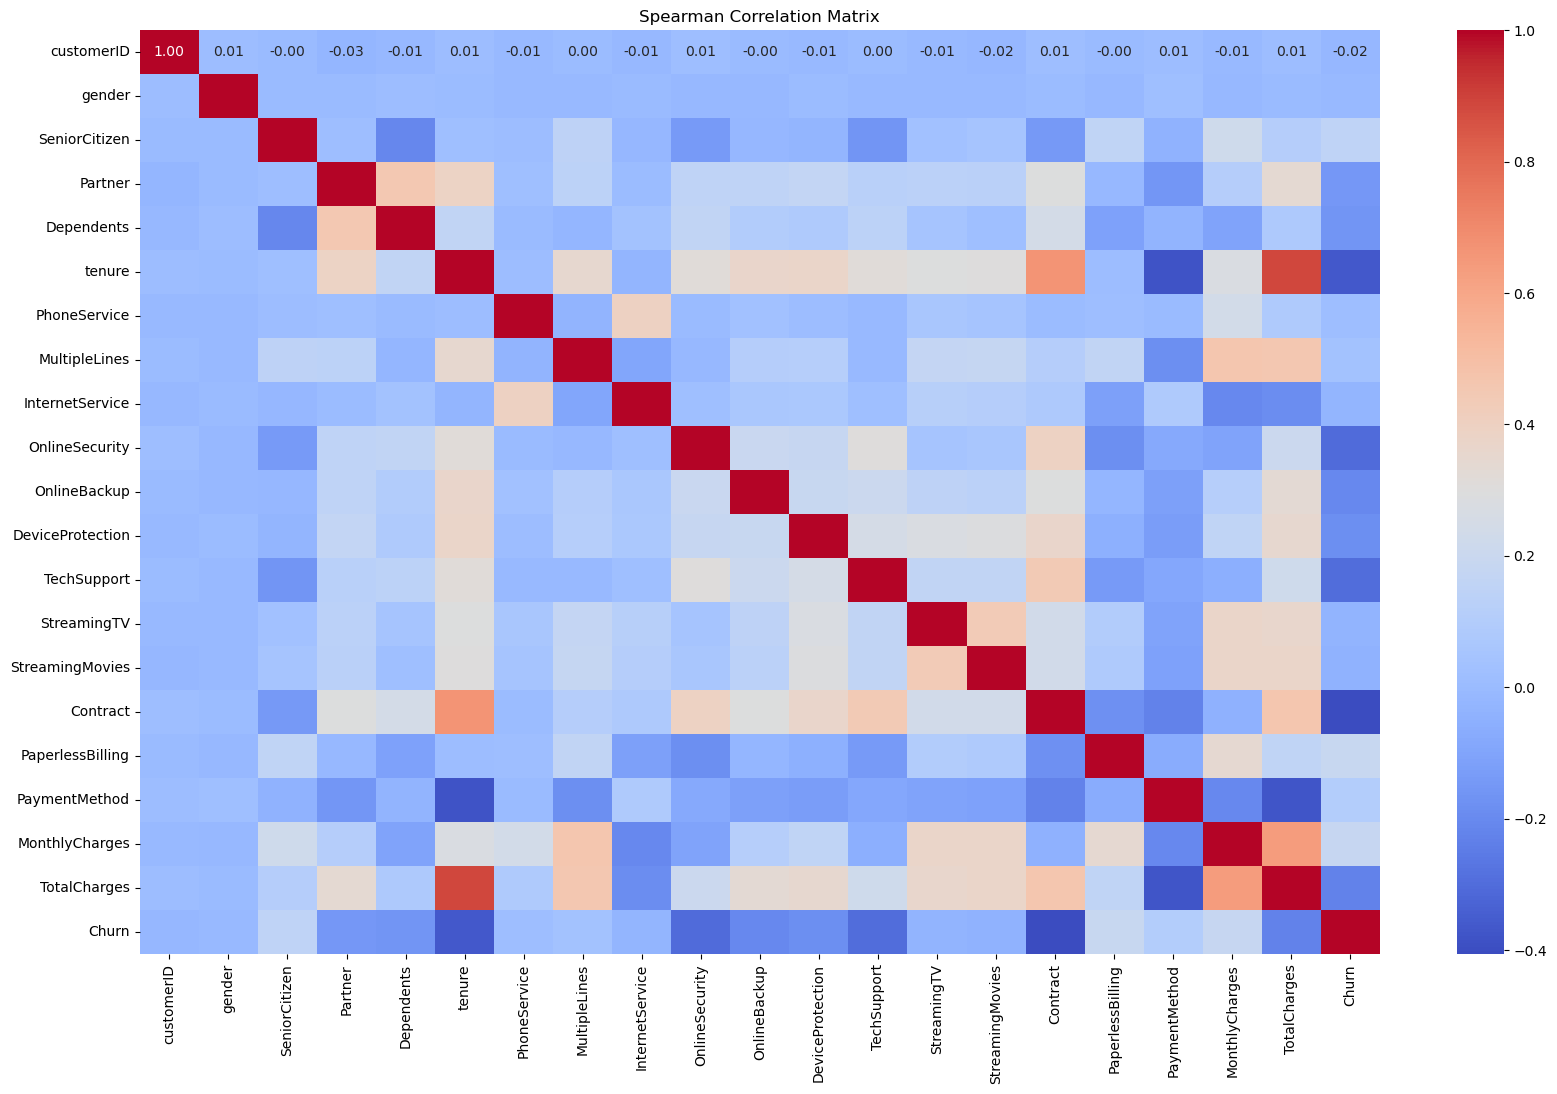

Top 5 Positive Correlations:
         Variable 1      Variable 2  Correlation
124          tenure    TotalCharges     0.889696
120          tenure        Contract     0.667623
397  MonthlyCharges    TotalCharges     0.638028
165   MultipleLines  MonthlyCharges     0.464210
334        Contract    TotalCharges     0.461810


Top 5 Negative Correlations:
         Variable 1     Variable 2  Correlation
335        Contract          Churn    -0.406262
122          tenure  PaymentMethod    -0.379356
376   PaymentMethod   TotalCharges    -0.377141
125          tenure          Churn    -0.367062
209  OnlineSecurity          Churn    -0.303918


In [111]:
# Precaution: Copy the original DataFrame
df_encoded = df.copy()

# Apply LabelEncoder to transform categorical columns into numeric columns
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Calculate the Spearman correlation matrix
correlation_matrix = df_encoded.corr(method='spearman')

# Visualize the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()

# Filter out redundant correlations and self-correlations
correlations = correlation_matrix.unstack().reset_index()
correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
correlations = correlations[correlations['Variable 1'] != correlations['Variable 2']]

# Sort variable names to avoid duplicates (e.g., A->B and B->A)
correlations['Pairs'] = correlations.apply(
    lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1
)
correlations = correlations.drop_duplicates(subset='Pairs').drop(columns='Pairs')

# Exclude correlations involving Churn and Churn_encoded
correlations = correlations[
    ~((correlations['Variable 1'].str.contains('Churn')) & (correlations['Variable 2'].str.contains('Churn')))
]

# Get the 5 most significant positive and negative correlations
positive_corr = correlations.sort_values(by='Correlation', ascending=False).head(5)
negative_corr = correlations.sort_values(by='Correlation', ascending=True).head(5)

# Results
print('Top 5 Positive Correlations:')
print(positive_corr)
print()
print('\nTop 5 Negative Correlations:')
print(negative_corr)


Strength between correlations:

    - 0.0 > 0.2 -> Very Weak
    - 0.2 > 0.4 > Weak
    - 0.4 > 0.6 > Moderate
    - 0.6 > 0.8 > Strong
    - 0.8 > 1.0 > Very Strong

High collinearity identified between tenure and TotalCharges. After identifying which one has the greatest relationship with churn, the other will be removed to avoid concurrency in the application of the model.

**Understandig the categorical values correlation with the target.**

Cramers'V test:

Cramér's V measures the strength of the association between two categorical variables, ranging from 0 to 1:

    - 0: There is no association between the variables.
    - 1: Perfect association between the variables.

Typical interpretation ranges:

    - 0 to 0.10: Very weak association.
    - 0.10 to 0.30: Moderate association.
    - 0.30 to 0.50: Strong association.
    - > 0.50: Very strong association.

In [112]:
# Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Store the results in a list for later sorting
results = []

for col in df.select_dtypes(include=['object', 'category']).columns:
    if col != 'Churn':  # Avoid comparing the target with itself
        score = cramers_v(df[col], df['Churn'])
        results.append({'Variable': col, 'Cramér\'s V': score})

# Create a DataFrame to sort the results
results_df = pd.DataFrame(results)

# Sort in descending order (1 to 0) based on Cramér's V
results_df = results_df.sort_values(by='Cramér\'s V', ascending=False)

results_df


,Variable,Cramér's V
0,customerID,1.000000
13,Contract,0.410116
7,OnlineSecurity,0.347400
10,TechSupport,0.342916
6,InternetService,0.322455
15,PaymentMethod,0.303359
8,OnlineBackup,0.292316
9,DeviceProtection,0.281580
12,StreamingMovies,0.230951
11,StreamingTV,0.230502


Strong relationship with the target of the categorical variables:

    - Contract;
    - OnlineSecurity;
    - TechSupport;
    - InternetService;
    - PaymentMethod.

**Uderstanding with whether the means of numerical variables differ across categories of the target variable.**

    - ANOVA (Analysis of Variance): used when the conditions of normality and homoscedasticity (equal variances) are met.
    - Kruskal-Wallis is a nonparametric alternative to ANOVA and does not assume normality or equal variances. Use this test when the data do not meet the prerequisites for ANOVA.

Understanding:

    - Distribuition;
    - Variance.

In [113]:
# For results dataframe
results = []

# Iterate over all numeric columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    # Normality test:
    stat_shapiro, p_shapiro = shapiro(df[col])

    # Variance test:
    stat_levene, p_levene = levene(df[col], df[col])

    results.append({
        'Column': col,
        'Shapiro-Wilk p-value': p_shapiro,
        'Levene p-value': p_levene
    })

# Results dataframe
results_df = pd.DataFrame(results)

results_df

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Column,Shapiro-Wilk p-value,Levene p-value
0,SeniorCitizen,0.0,1.0
1,tenure,0.0,1.0
2,MonthlyCharges,0.0,1.0
3,TotalCharges,0.0,1.0


Shapiro-Wilk results:

    - The three columns don't follow a normal distribuition (p-value < 0.05 -> Null hypothesis rejected);
    

Levene Test (Homoscedasticity):

    - The variances are approximately equal (p-value ≥ 0.05 -> Null hypothesis not rejected).

PS.: Homoscedasticity -> Condition where the variances of the data are approximately equal between different categories or groups.


Normality criterion not met for application of the ANOVA test.

**Kruskal-Wallis Test**

Null Hypothesis (H0):
The medians of the distributions of the numerical variable are the same for all Churn categories.

If p-value < 0.05, we reject the null hypothesis, indicating that there is a significant difference in the medians of the categories.

If p-value ≥ 0.05, we do not reject the null hypothesis.

In [114]:
# Target:
target = 'Churn'

# Calculate the Kruskal-Wallis test for each numeric variable
results = []
for col in numerical_columns:  
    groups = [df[df[target] == category][col] for category in df[target].unique()]
    stat, p = kruskal(*groups)
    results.append({
        "Column": col,
        "H Stats": stat,
        "p-value": p
    })

# Results dataframe
results_df = pd.DataFrame(results)

# Ordenar os resultados do teste Kruskal-Wallis pela maior interferência em Churn (H Stats em ordem decrescente)
results_df = results_df.sort_values(by='H Stats', ascending=False)

# Exibir o DataFrame ordenado
print(results_df)


           Column     H Stats        p-value
1          tenure  948.799692  2.419140e-208
3    TotalCharges  372.376884   5.684304e-83
2  MonthlyCharges  240.342632   3.311286e-54
0   SeniorCitizen  160.329364   9.587087e-37



- All tested variables have very small p-values;
- Relative importance (based on H Stats): The tenure variable it may be the most relevant for separating Churn categories. But all variables have a significant impact on churn.

Due to the high collinearity between tenure and TotalCharges and the fact that tenure has a greater correlation with the target, we will eliminate the TotalCharges variable from the dataframe.

In [115]:
df = df.drop(columns=['TotalCharges'], errors='ignore')

### Exporting to .csv

In [116]:
file_name = 'pre_processed.xlsx'
df.to_excel(file_name, index = False)